# Méthodes de la sécante et de Newton

<u>Remarque</u>

Pour ce cours, l afonction étudié est la suivante:
$$f(x) = x^{3} \cdot \sin(\pi x)$$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

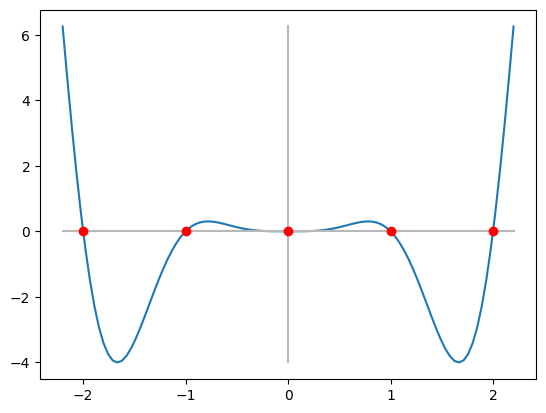

In [2]:
# Définition et représentation de la fonction g
def g(x):
    return pow(x,3)*np.sin(np.pi*x)

x_min = -2.2
x_max = 2.2

x = np.linspace(x_min,x_max,100)
y = g(x)
plt.plot(x,y)
plt.plot([x[0],x[-1]], [0,0], c='0.72')
plt.plot([0,0], [y.min(),y.max()], c='0.72') 
plt.plot([-2,-1,0,1,2],[0,0,0,0,0],'ro')       # zéros alpha placés "à la main"
plt.show()

Pour obtenir des méthodes plus performantes, il est nécessaire de prendre en compte le comportement de la fonction $f$ au voisinage de la racine.

[<u>**Théorème de Taylor**</u>]( https://www.geogebra.org/m/dxg3kb7w )

Soit $I \subset \R$ un intervalle ouvert, $a \in I$ et une fonction $f\colon I \to \R$, $f \in C^{n+1}(I)$, i.e., $f$ est $n+1$ fois dérivable sur $I$.
$$f(x) = f(a) + f^{\prime}(a) (x-a) + \frac{f^{\prime\prime}(a)}{2} (x - a)^{2} + ... + \frac{f^{(n)}(a)}{n!} (x-a) + \frac{f^{(n+1)}(\xi)}{(n+1)!} (x-a)^{n+1} = p(a, x, n) + r(a, x, \xi, n)$$

où $\xi \in [a, x]$.


En particulier, en développant cette fonction au premier ordre autour de $\alpha$, on obtient
$$ f(x) = f(\alpha) + f^{\prime}(\xi) (x-\alpha) $$
où $\xi \in [x, \alpha]$

<span style="color:red">Il s'agit ici d'un résultat exacte !</span>

$$ \begin{aligned}
        f(\alpha) =& f(x) - f^{\prime}(x-\alpha)\\
                  =& 0
\end{aligned}$$

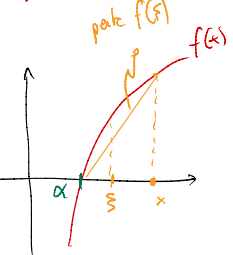

Ainsi
$$f^{\prime}(\xi) = \frac{f(x)}{x-a} = ?$$
peut nous permettre de trouver la racine $\alpha$ en une itération. Sur la base de cette relation, on peut construire une suite $\{x_{k}\}$ qui devrait converger vers $\alpha$ telle que
$$ f(x_{k}) - q_{k}(x_{k} - x_{k+1}) = 0 \implies \textcolor{red}{x_{k+1} = x_{k} - q_{k}^{-1} \cdot f(x_{k})} $$
où $q_{k}$ est une approximation de $f(\xi)$.

Géométriquement, on cherche l'intersection entre la droite de pente $q_{k}$ qui passe par le point $(x_{k}, f(x_{k}))$ et l'axe $y = 0$

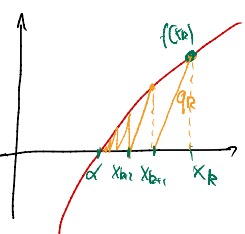

Le principal défi de cette méthode ce'st de trouver le meilleur $q_{k}$ possible (à chaque itération).


## Méthode de la sécante

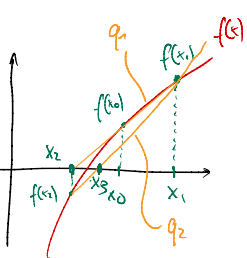

On pose
$$ q_{k} = \frac{f(x_{k}) - f(x_{k-1})}{x_{k} - x_{k-1}}$$
Il s'agit de la pente de la droite qui relie les points $(x_{k}, f(x_{k}))$ et $(x_{k-1}, f(x_{k-1}))$.

[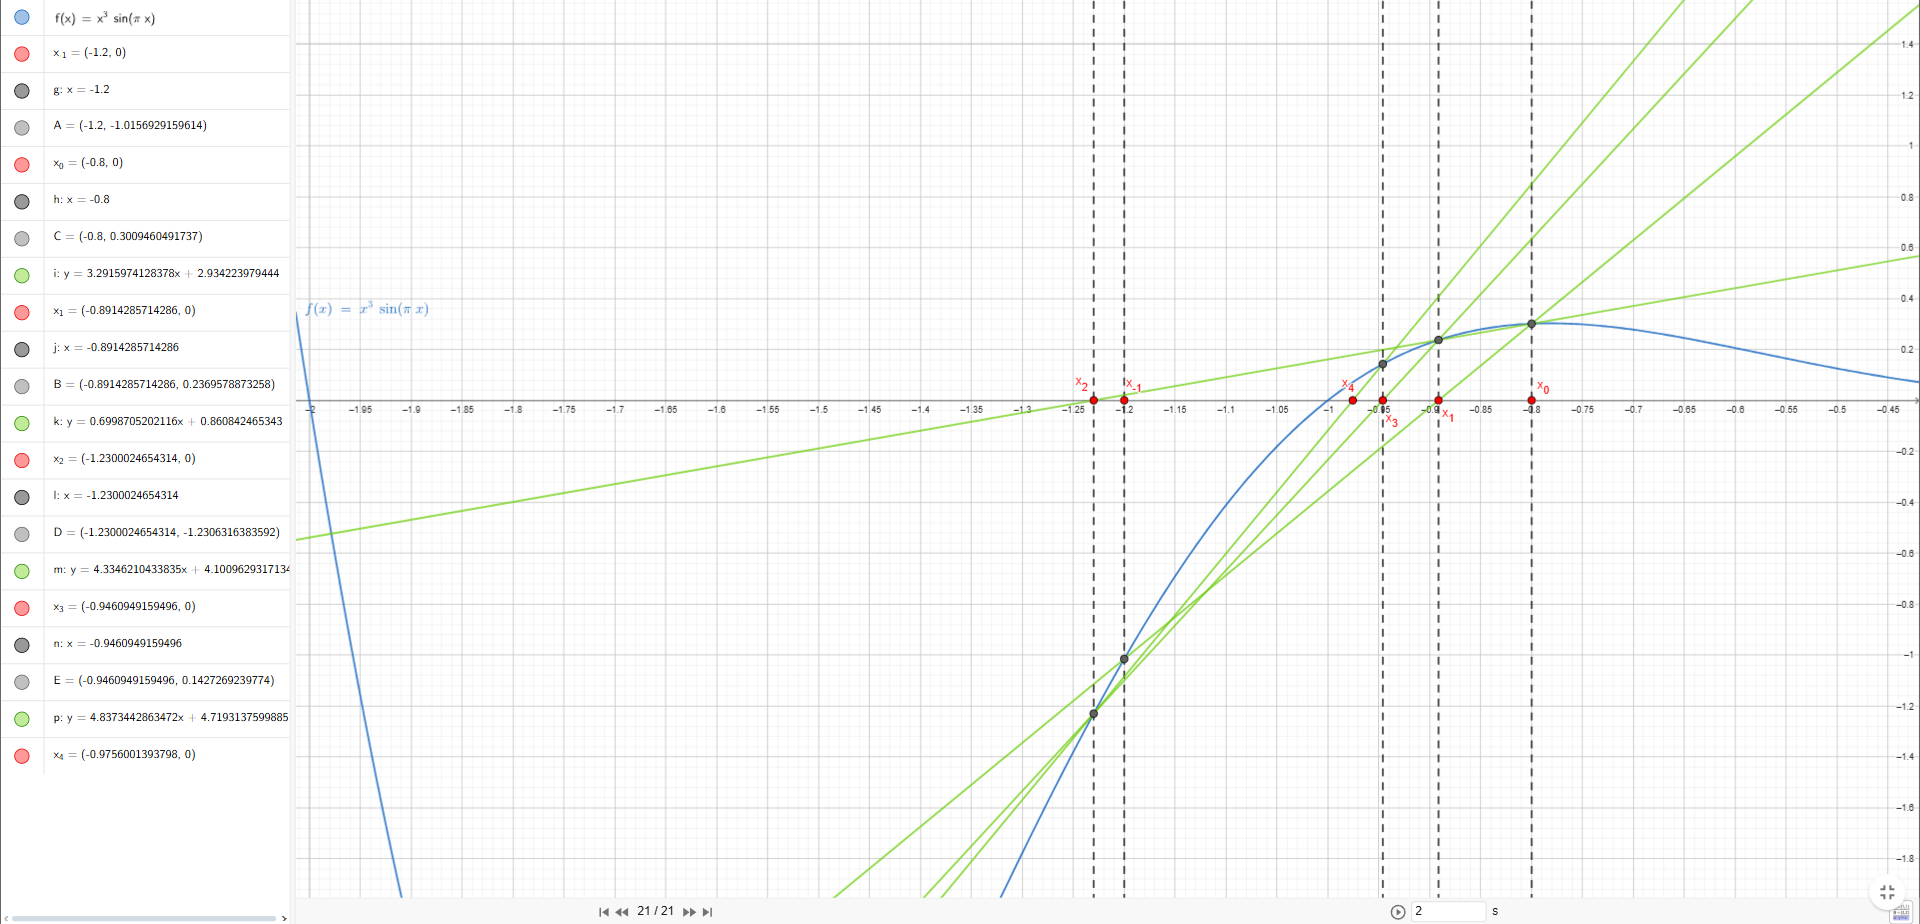]( https://www.geogebra.org/m/m6ygbjnh )


In [3]:
# méthode de la sécante
def resoudre_par_secante(f,x_m1,x_0,eps,k_max):
    if x_m1 == x_0 or abs(x_0-x_m1) < eps:
            raise ValueError("Attention : les arguments x_m1 et x_0 ne peuvent pas être identiques ou éloignés d'une distance inférieure à eps!")
    nb_iterations = 0
    erreur = abs(x_0-x_m1)
    x_kmoins = x_m1
    x_k = x_0
    valeur_f_kmoins = f(x_kmoins)
    valeur_f_k = f(x_k) 
    evolution = [] # liste permettant de suivre l'évolution de la convergence
    while erreur > eps and nb_iterations < k_max:
        # on définit :
        # x_{k+1} = x_k - q_k^{-1}*f(x_k)
        # avec:
        # x_{k+1} <- x
        # x_k <- x_k 
        # x_{k-1} <- x_kmoins
        x = x_k - ( x_k - x_kmoins ) * f(x_k) / ( f(x_k) - f(x_kmoins) )
        x_kmoins, x_k = x_k, x # x_nmoins devient x_k et x_k devient x
        nb_iterations += 1
        valeur_f_k = f(x_k)
        valeur_f_kmoins = f(x_kmoins)
        erreur = abs(x_k-x_kmoins)
        evolution.append(x_k)
    return x_k, evolution


a_0 = -1.2
b_0 = -0.9
# Attention, la convergence dépend fortement du point de départ !!
# b_0 = 0.1
tolerance = 1e-8
k_max = 100

# Recherche du zéro par la méthode de la sécante:
resultat_secante = resoudre_par_secante(g,a_0,b_0,tolerance,k_max)
print('Zéro trouvé par la méthode de la sécante : x =', resultat_secante[0])
print("Le nombre d'itérations effectuées est : k =", len(resultat_secante[1]))
for i in range(len(resultat_secante[1])):
    print(f"Itération {i} : {resultat_secante[1][i]}")

Zéro trouvé par la méthode de la sécante : x = -0.9999999999999951
Le nombre d'itérations effectuées est : k = 7
Itération 0 : -0.9544591874937214
Itération 1 : -1.021111629926926
Itération 2 : -0.9969357564829252
Itération 3 : -0.9998145771435596
Itération 4 : -1.0000017187507197
Itération 5 : -0.9999999990434653
Itération 6 : -0.9999999999999951


<u>Remarques</u>

1. Il faut connaitre deux valeurs de départ pour initialiser la suite.
2. La convergence de la suite n'est pas assurée. Toute fois, si $f \in C^{1}(I)$ et si $f^{\prime}(\alpha) \neq 0$ et si $x_{0}$ et $x_{1}$ sont proche de $\alpha$, alors on peut montrer que la suite converge avec $p = \frac{1+\sqrt{5}}{2} \approx 1.618$.
3. Contrairement à la méthode de la bissectiom les points $x_{0}$ et $x_{1}$ considérés n'ont pas besoin d'encardrer la racine.


## Méthode de Newton

Soit $f \in C^{1}(I)$, et telle que $f^{\prime}(\alpha) = 0$. On pose $q_{k} = f^{\prime}(x_{k}), \forall k > 0$, et on choisit une bonen approximation de $x_{0}$.

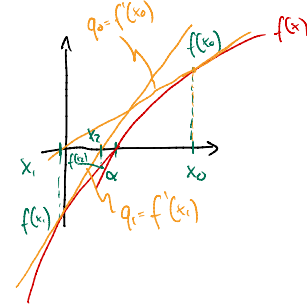

On crée ainsi une suite $\{ x_{k} \}$ telle que
$$ x_{k+1} = x_{k} - \frac{f(x_{k})}{f^{\prime}(x_{k})} $$
qui converge vers $\alpha$.
[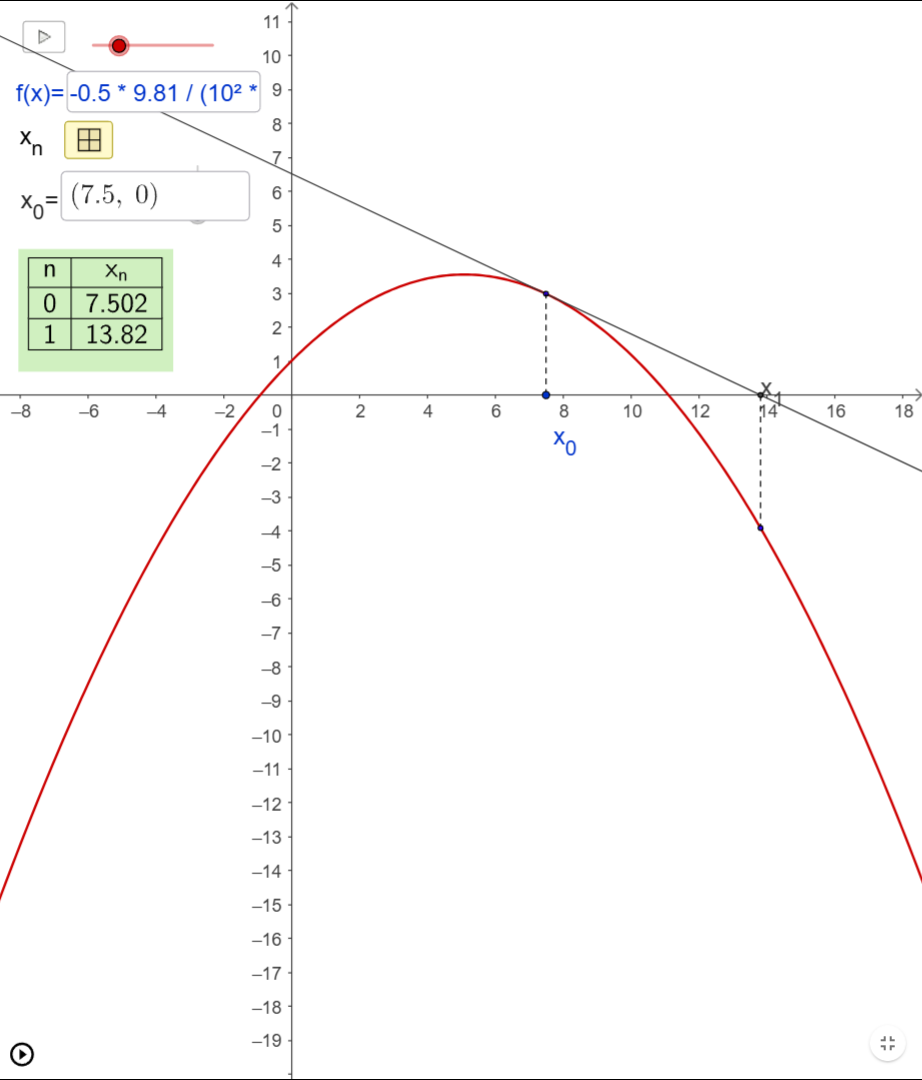](https://www.geogebra.org/m/krsxmp6u)

<u>Remarques</u>

1. Si la fonction est sufisamment régulière est que $x_{0}$ est bien choisi, alors on peut montrer que $p = 2$
2. Cette méthode est plsu coûteuse numériquement que celle de la sécante car il faut calculer la dérivée de $f$ en tout point.
3. Pour trouver une "bonne" approximation de départ $x_{0}$, on utilise en générale la méthode de la bissection.

In [4]:
def resoudre_par_Newton(f, x_0, fprime, eps, k_max):
    nb_iterations = 0
    x = x_0
    valeur_f = float(f(x)) # dans les versions antérieures à Python 3, 
                           # la division plus bas peut soulever un problème de type
    evolution = [x] # pour pouvoir suivre l'évolution de la convergence
    while abs(valeur_f) > eps and nb_iterations < n_max:
        valeur_fprime = fprime(x)
        if abs(valeur_fprime) < 1e-10:
            raise ValueError("Probable problème de division par zéro !")
        x = x - valeur_f/valeur_fprime
        nb_iterations += 1
        valeur_f = f(x)
        evolution.append(x)
    return x, evolution

# recherche du premier zéro de la fonction f
x_0 = -0.95
# Attention, la convergence dépend fortement du point de départ !!
# => on trouve un différent 0
#x_0 = -0.77
eps = 1e-8
n_max = 30
def gprime(x):
    return pow(x,2)*(np.pi*x*np.cos(np.pi*x)+3*np.sin(np.pi*x))
#x, evolution = resoudre_par_Newton(g,x_0,gprime,eps,n_max)

resultat_Newton = resoudre_par_Newton(g,x_0,gprime,eps,n_max)
print('Zéro trouvé par la méthode de Newton : x =', resultat_Newton[0])
print("Le nombre d'itérations effectuées est : k =", len(resultat_Newton[1]))
for i in range(len(resultat_Newton[1])):
    print(f"Itération {i} : {resultat_Newton[1][i]}")

Zéro trouvé par la méthode de Newton : x = -1.0000000000001732
Le nombre d'itérations effectuées est : k = 5
Itération 0 : -0.95
Itération 1 : -1.009961598296213
Itération 2 : -1.0002832235513448
Itération 3 : -1.0000002402998058
Itération 4 : -1.0000000000001732


On peut désormais comparer les ordres de convergences des différentes méthodes:

In [5]:
def resoudre_par_bissection_simple(f,a,b,eps):
    compteur_iterations = 0
    if f(a)*f(b) >= 0:
        print("L'intervalle considéré n'est pas approprié à la méthode de la bissection simple !")
        return
    else:
        evolution = [] # liste permettant de suivre l'évolution de la convergence
        while (b - a)/2 > eps:
            point_milieu = (a + b)/2
            evolution.append(point_milieu)
            if f(a)*f(point_milieu) < 0:
                a = a
                b = point_milieu
                compteur_iterations += 1
            elif f(b)*f(point_milieu) < 0:
                a = point_milieu
                b = b
                compteur_iterations += 1
            elif f(point_milieu) == 0:
                print('La solution obtenue est exacte !')
                return (point_milieu,compteur_iterations)
            else:
                print("Le zéro n'a pas pu être approché.")
    return ((a + b)/2,evolution,compteur_iterations)


# Valeurs choisies pour notre problème particulier :
a_0 = -1.2
b_0 = -0.9
tolerance = 1e-8

# recherche du zéro :
resultat_bissection = resoudre_par_bissection_simple(g,a_0,b_0,tolerance)
print('Zéro trouvé par la méthode de la bissection simple : x =', resultat_bissection[0])
print("Le nombre d'itérations effectuées est : k =", len(resultat_bissection[1]))

Zéro trouvé par la méthode de la bissection simple : x = -1.0000000029802325
Le nombre d'itérations effectuées est : k = 24


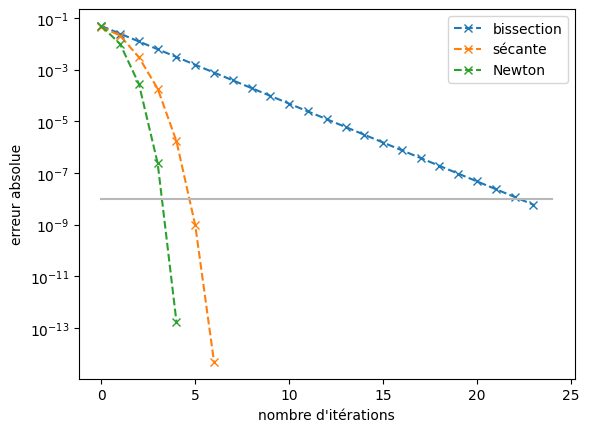

In [6]:
erreur_bissection = abs(-1-np.array(resultat_bissection[1][0:]))
erreur_secante = abs(-1-np.array(resultat_secante[1][0:]))
erreur_Newton = abs(-1-np.array(resultat_Newton[1][0:]))
plt.yscale("log")
plt.xlabel("nombre d'itérations") # En fait, "nombre d'itérations - 1"
plt.ylabel('erreur absolue')
plt.plot(erreur_bissection, '--x', label="bissection")
plt.plot(erreur_secante, '--x', label="sécante")
plt.plot(erreur_Newton, '--x', label="Newton")
plt.plot([0, 24],[tolerance, tolerance], c='0.72')
plt.legend(loc='best')
plt.show()

## Méthodes du point fixe

Pour $f \colon [a, b] \to \R$, on peut toujours transformer le problème $f(\alpha) = 0$ en un problème équivalent
$$ \alpha - \Phi(\alpha) = 0$$
où $\phi$ est une fonction auxiliaire $\Phi \colon [a, b] \to \R$ telle que si
$$ f(\alpha) = 0 \implies \Phi(\alpha) = \alpha $$
On transforme la recherche des racines de $f$ en un problème de recherche de point fixes de $\Phi$.


<u>Remarque</u>

Le choix de $\Phi(x)$ n'est pas unique. ($\Phi(x) = x + \lambda f(x)$). Toute fonction auxiliaire $\Phi(x) = x + F(f(x))$ telle que $F(0) = 0$ et $F$ est continue peut fonctionner.

### Méthode de Picard

Étant donnée une "bonne" approximation de $x_{0}$, on construit une suite $\{ x_{k} \}$ telle que
$$ x_{k+1} = \Phi(x_{k}) $$
Cette relation est appelée itération de Picard.


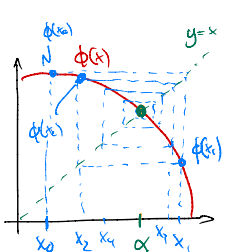

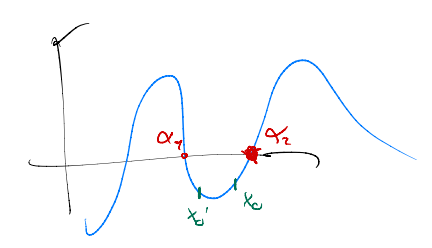


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\romai\AppData\Local\Temp\ipykernel_51692\1500006226.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, phi(x), label='$y = \phi(x)$')
C:\Users\romai\AppData\Local\Temp\ipykernel_51692\1500006226.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Représentation de la fonction d'itération $\phi(x)$")


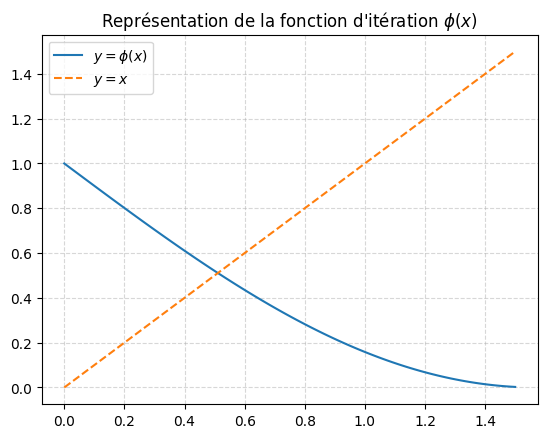

In [7]:
# fonction phi étudiée : phi(x) = 1-sin(x)
# L'équation phi(x)=x 
# n'est pas solvable analytiquement.
def phi(x):
    return 1-np.sin(x)


x = np.linspace(0,1.5,100)
plt.plot(x, phi(x), label='$y = \phi(x)$')
plt.title("Représentation de la fonction d'itération $\phi(x)$")
plt.plot(x, x, '--', label="$y=x$")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()
plt.show()

In [8]:
# On montre que la suite définie par
#       x_{k+1} = phi(x_k)
# converge vers un point fixe

x=2
out = []
for i in range(41):
    x = phi(x)
    if not i%2:
        print(f"{i=}: \t{x=}, \tphi(x)={1-np.sin(x)}, \tx-phi(x)={x-1+np.sin(x)}")
    out.append(x)

i=0: 	x=np.float64(0.09070257317431829), 	phi(x)=0.9094217433688836, 	x-phi(x)=-0.8187191701945653
i=2: 	x=np.float64(0.21085129483714748), 	phi(x)=0.7907075831219312, 	x-phi(x)=-0.5798562882847837
i=4: 	x=np.float64(0.2891488763857998), 	phi(x)=0.7148634623608269, 	x-phi(x)=-0.4257145859750271
i=6: 	x=np.float64(0.3444856880622327), 	phi(x)=0.6622873737998314, 	x-phi(x)=-0.31780168573759865
i=8: 	x=np.float64(0.38507774600707567), 	phi(x)=0.6243688095100897, 	x-phi(x)=-0.239291063503014
i=10: 	x=np.float64(0.4154147157860417), 	phi(x)=0.5964305911132315, 	x-phi(x)=-0.1810158753271897
i=12: 	x=np.float64(0.4383070775884631), 	phi(x)=0.5755928189381028, 	x-phi(x)=-0.1372857413496396
i=14: 	x=np.float64(0.45566781581700644), 	phi(x)=0.5599379113115677, 	x-phi(x)=-0.10427009549456123
i=16: 	x=np.float64(0.468866408061556), 	phi(x)=0.5481246800148993, 	x-phi(x)=-0.0792582719533434
i=18: 	x=np.float64(0.4789124455057563), 	phi(x)=0.5391857526733494, 	x-phi(x)=-0.060273307167593104
i=20: 	x=

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\romai\AppData\Local\Temp\ipykernel_51692\3860355897.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Convergence de la suite $x_{k+1}=\phi(x_k)$")
C:\Users\romai\AppData\Local\Temp\ipykernel_51692\3860355897.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$x_{k+1}=\phi(x_k)$")


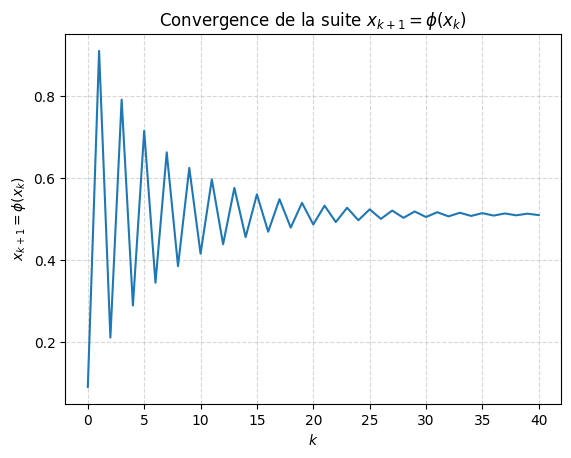

In [9]:
plt.plot(out)
plt.title("Convergence de la suite $x_{k+1}=\phi(x_k)$")
plt.xlabel("$k$")
plt.ylabel("$x_{k+1}=\phi(x_k)$")
plt.grid(True, which="both", ls="--", alpha=0.5)

### Implémentation de la fonction d'itération de Picard

In [10]:
# recherche du point fixe à l'aide de la méthode de Picard
def resoudre_par_Picard(phi,x_0,eps,k_max,couleur): 
    iteration = 0
    condition = True
    plt.plot([x_0], [x_0], color = couleur, marker='o')
    while iteration < k_max and condition:
        x_1 = phi(x_0)
        condition = abs(x_1-x_0) > eps
        plt.plot([x_0,x_0], [x_0,x_1], color = couleur)
        plt.plot([x_0,x_1], [x_1,x_1], color = couleur)
        x_0 = x_1
        iteration += 1
    return x_0,iteration

## Choix d'une bonne fonction d'itération

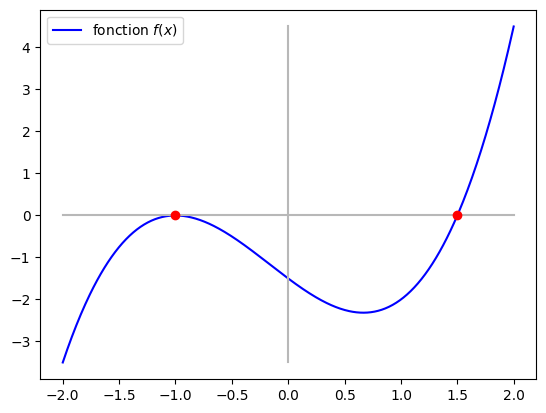

In [11]:
# Représentation graphique de la fonction pour avoir une idée de l'allure de cette dernière
def f(x):
    return (x+1)**2*(x-1.5)

x = np.linspace(-2,2,500)
y = f(x)
plt.plot(x,y,'b',label='fonction $f(x)$')
plt.legend(loc='best')
plt.plot([x[0],x[-1]], [0,0], c='0.72')
plt.plot([0,0], [y.min(),y.max()], c='0.72') 
plt.plot([-1,1.5], [0,0],'ro') 
plt.show()

### Mauvaise fonction d'itération

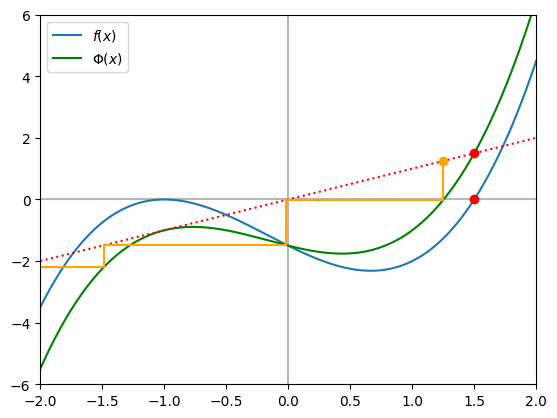

Zéro trouvé par la méthode de Picard : x = -1.4044583795355363e+69
Le nombre d'itérations effectuées est : n = 8


In [12]:
# Divergence de la fonction phi(x) 
 
def phi(x):
    return x+f(x)
# on vérifie que :
# phi(alpha) = alpha+f(alpha) = alpha
# A priori il s'agit d'une bonne fonction d'itération ! 

x0 = 1.25
kmax = 8
x = np.linspace(-2,2,1000) 


plt.plot([x[0],x[-1]], [0,0], c='0.72')
plt.plot([0,0], [-6,6], c='0.72')
plt.plot(x,f(x),label='$f(x)$')
plt.plot(x,phi(x), 'g',label='$\\Phi(x)$')
plt.plot(x,x,'r',linestyle='dotted')
plt.plot([1.5], [0],'ro') 
plt.plot([1.5], [1.5],'ro') 
# Faites varier le nombre d'itérations !!!
resultat = resoudre_par_Picard(phi,x0,1e-6,kmax,'orange')
plt.legend(loc='best')
plt.xlim([-2, 2])
plt.ylim([-6, 6])
plt.show()
print('Zéro trouvé par la méthode de Picard : x =', resultat[0])
print("Le nombre d'itérations effectuées est : n =", resultat[1])

### Bonne fonction d'itération

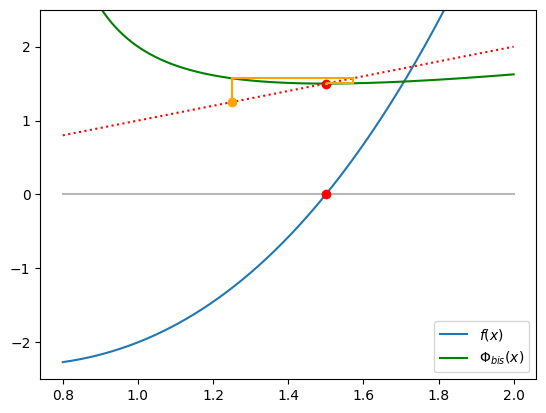

Zéro trouvé par la méthode de Picard : x = 1.5
Le nombre d'itérations effectuées est : n = 5


In [13]:
def h(x):
    return 3*x**2+x-2

def phi_bis(x):
    return x-f(x)/h(x)
# on vérifie que :
# phi(alpha) = alpha-f(alpha)/h(alpha) = alpha
# si h(alpha) != 0, à montrer plus tard !
# A priori il s'agit d'une bonne fonction d'itération !
 
# Remarque, quel est le lien entre f(x) et h(x) ???

x0 = 1.25
x = np.linspace(0.8,2,1000)

plt.plot([x[0],x[-1]], [0,0], c='0.72')
#plt.plot([0,0], [-0.1,0.1], c='0.72')
plt.plot(x,f(x),label='$f(x)$')
plt.plot(x,phi_bis(x), 'g',label='$\\Phi_{bis}(x)$')
plt.plot(x,x,'r',linestyle='dotted')
plt.plot([1.5], [0],'ro') 
plt.plot([1.5], [1.5],'ro') 
plt.ylim([-2.5, 2.5])
resultat = resoudre_par_Picard(phi_bis,x0,1e-6,100,'orange')
plt.legend(loc='best')
plt.show()
print('Zéro trouvé par la méthode de Picard : x =', resultat[0])
print("Le nombre d'itérations effectuées est : n =", resultat[1])

<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
C:\Users\romai\AppData\Local\Temp\ipykernel_51692\2958600842.py:19: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, phi_1_p(x), label="$\phi_1'(x)$")
C:\Users\romai\AppData\Local\Temp\ipykernel_51692\2958600842.py:20: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, phi_bis_p(x), label="$\phi_2'(x)$")


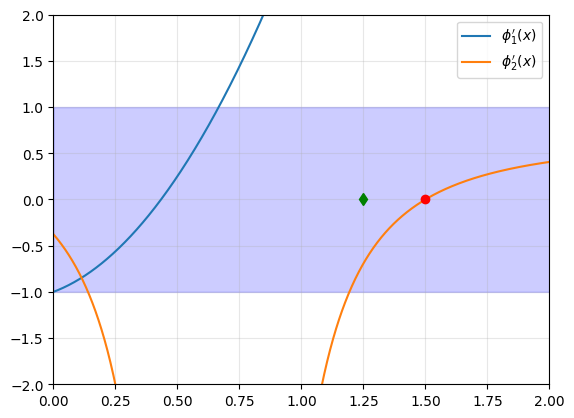

In [14]:
def phi_1_p(x):
    return 1 + (x + 1) * (3 * x - 2) 

# Définition des fonctions
def f(x):
    return (x + 1)**2 * (x - 1.5)

def f_prime(x):
    return 3*x**2 + x - 2  # dérivée exacte de f(x)

def f_double_prime(x):
    return 6*x + 1  # dérivée seconde de f(x)

def phi_bis_p(x):
    return (f(x) * f_double_prime(x)) / (f_prime(x)**2)


x = np.linspace(0,2,1001)
plt.plot(x, phi_1_p(x), label="$\phi_1'(x)$")
plt.plot(x, phi_bis_p(x), label="$\phi_2'(x)$")
plt.fill_between(x,-1,+1,alpha=0.2,color="blue")
plt.plot([-1,1.5], [0,0],'ro') 
plt.plot([-1.25,1.25], [0,0],'gd') 
plt.grid(alpha=0.3)
plt.legend()
plt.xlim([0, +2])
plt.ylim([-2, 2])
plt.show()
